<a href="https://colab.research.google.com/github/unicamp-dl/IA025_2022S1/blob/main/ex04/Alexander_Valle/IA025_ex04_Alexander_Valle__Exerc%C3%ADcio_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

Nome: Rolan Alexander Valle Rey Sánchez ra:230254

Este exercicío consiste em treinar um modelo de uma única camada linear no MNIST **sem** usar as seguintes funções do pytorch:

- torch.nn.Linear
- torch.nn.CrossEntropyLoss
- torch.nn.NLLLoss
- torch.nn.LogSoftmax
- torch.optim.SGD
- torch.utils.data.Dataloader

## Importação das bibliotecas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torchvision
from torchvision.datasets import MNIST

## Fixando as seeds

In [ ]:
random.seed(123)
np.random.seed(123)
torch.manual_seed(123)

## Dataset e dataloader

### Definição do tamanho do minibatch

In [ ]:
batch_size = 50

### Carregamento, criação dataset e do dataloader

In [ ]:
dataset_dir = '../data/'

dataset_train_full = MNIST(dataset_dir, train=True, download=True,
                           transform=torchvision.transforms.ToTensor())
print(dataset_train_full.data.shape)
print(dataset_train_full.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


### Usando apenas 1000 amostras do MNIST

Neste exercício utilizaremos 1000 amostras de treinamento.

In [ ]:
indices = torch.randperm(len(dataset_train_full))[:1000]
dataset_train = torch.utils.data.Subset(dataset_train_full, indices)

In [ ]:
# Escreva aqui o equivalente do código abaixo:
# loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=False)

In [ ]:
a=np.arange(23)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [ ]:
np.random.shuffle(a)
a

array([ 5, 19, 20, 18, 14,  8,  7, 11,  4,  3, 22, 12, 15,  9, 16,  0,  1,
       10, 17,  6, 21,  2, 13])

In [ ]:
for k in range(5):
  print('k',k,' ',a[5*k:5+5*k])

k 0   [ 5 19 20 18 14]
k 1   [ 8  7 11  4  3]
k 2   [22 12 15  9 16]
k 3   [ 0  1 10 17  6]
k 4   [21  2 13]


In [ ]:
import itertools
import random 
from random import sample 
import pandas as pd
def MyDataLoader(batch_size,DF):

  def xysplit(datafm):
    """
    this subfuction split data into X andy
    """    
    for i, (xi,yi) in enumerate(datafm):  
      if i==0 :    
        x=xi
        y=[yi] 
      else:
        x=torch.cat((x,xi), 0)
        y.append(yi)
        #print(y)
    return x,y

  def fixtensorarray(xbatch):
    """
    this subfuction fix the array of tensos to a tensor
    """
    for i, xi in enumerate(xbatch):  
      xxi=xi[0].reshape([1,1]+list(xi[0].shape)) 
      if i==0 :    
        xx=xxi
      else:
        xx=torch.cat((xx,xxi), 0)
    return xx

  X_train,y_train=xysplit(DF)


  # we use data frame and randon operation to create the index for the baches
  df = pd.DataFrame(X_train)# imput
  df.columns=np.array(['x_'+str(c) for c in df.columns.values])
  xfeatures=df.columns.values
  df['y']=y_train#imput
  datindex=df.index.values
  nb=len(datindex)
  ni=np.ceil(nb/batch_size).astype(int)
  datacuts=[]
  strain= set(datindex)

  # now we create the baches 
  for _ in range(ni):
    batchindex=set(random.sample(strain,batch_size))
    strain= strain-batchindex
    Xcut=df.iloc[list(batchindex)][xfeatures].values
    ycut=df.iloc[list(batchindex)]['y'].values
    Xbacth=fixtensorarray(Xcut)#torch.from_numpy(Xcut.astype(np.float64))
    ybacth=torch.from_numpy(ycut.T)#.astype(np.float64)ycut.T#
    ykbacth=ybacth#.reshape(len(ybacth), 1)
    datacuts.append( (Xbacth,ykbacth))
  return datacuts

loader_train=MyDataLoader(batch_size,dataset_train)


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  values = np.array([convert(v) for v in values])
/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [ ]:
import itertools
import random 
from random import sample 
import pandas as pd
def MyDataLoader(batch_size,DF):

  def xysplit(datafm):
    """
    this subfuction split data into X andy
    """    
    for i, (xi,yi) in enumerate(datafm):  
      if i==0 :    
        x=xi
        y=[yi] 
      else:
        x=torch.cat((x,xi), 0)
        y.append(yi)
        #print(y)
    return x,y

  def fixtensorarray(xbatch):
    """
    this subfuction fix the array of tensos to a tensor
    """
    for i, xi in enumerate(xbatch):  
      xxi=xi[0].reshape([1,1]+list(xi[0].shape)) 
      if i==0 :    
        xx=xxi
      else:
        xx=torch.cat((xx,xxi), 0)
    return xx

  X_train,y_train=xysplit(DF)


  # we use data frame and randon operation to create the index for the baches
  df = pd.DataFrame(X_train)# imput
  df.columns=np.array(['x_'+str(c) for c in df.columns.values])
  xfeatures=df.columns.values
  df['y']=y_train#imput
  datindex=df.index.values
  nb=len(datindex)
  ni=np.ceil(nb/batch_size).astype(int)
  datacuts=[]
  np.random.shuffle(datindex)
  strain= list(datindex)
  #strain= set(datindex)

  bz=batch_size
  # now we create the baches 
  for k in range(ni):
    batchindex=strain[bz*k:bz+bz*k]
    Xcut=df.iloc[batchindex][xfeatures].values
    ycut=df.iloc[batchindex]['y'].values
    Xbacth=fixtensorarray(Xcut)#torch.from_numpy(Xcut.astype(np.float64))
    ybacth=torch.from_numpy(ycut.T)#.astype(np.float64)ycut.T#
    ykbacth=ybacth#.reshape(len(ybacth), 1)
    datacuts.append( (Xbacth,ykbacth))
  return datacuts

loader_train=MyDataLoader(batch_size,dataset_train)


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  values = np.array([convert(v) for v in values])
/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [ ]:
# loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=False)

In [ ]:
print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 20

Dimensões dos dados de um minibatch: torch.Size([50, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


## Modelo

In [ ]:
# Escreva aqui o codigo para criar um modelo cujo o equivalente é: 
#model = torch.nn.Linear(28*28, 10)
#model.load_state_dict(dict(weight=torch.zeros(model.weight.shape), bias=torch.zeros(model.bias.shape)))

In [ ]:
class Linear():
  #RECICLED FROM EX03
  def __init__(self, n_in: int, n_out: int):
    # Não se esqueça de inicializar os pesos da rede com zeros.
    #print('n_in ', n_in,'  n_out ', n_out)
    self.weights = torch.zeros(n_in, n_out, requires_grad=True)
    self.bias=torch.zeros(1, n_out, requires_grad=True)

  def __call__(self, imputs):
    self.y_pred =self.bias+torch.matmul(imputs,self.weights)
    return self.y_pred

  def parameters(self):
    return self.weights, self.bias

model2=Linear(28*28,10)
    

In [ ]:
class ModelLinear():
    def __init__(self, in_size, out_size):
        self.weights = torch.zeros((in_size, out_size), requires_grad=True)
        self.bias = torch.zeros((1, out_size), requires_grad=True)

    def forward(self, x):
        return torch.mm(x, self.weights) + self.bias
    
    def __call__(self, x):
        return self.forward(x)

    def parameters(self):
        return self.weights, self.bias

model = ModelLinear(28*28, 10)

## Treinamento

### Inicialização dos parâmetros

In [ ]:
n_epochs = 50
lr = 0.1

## Definição da Loss



In [ ]:
# Escreva aqui o equivalente de:#
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
class CrossEntropyLoss(): 
  def logsoftmax(self,x):
    return torch.exp(x) - torch.sum(torch.exp(x), dim=1, keepdim=True)  
  def __call__(self,outputs, targets):
    # adapted from https://discuss.pytorch.org/t/how-to-write-custom-crossentropyloss/58072
    num_samples = targets.shape[0]
    batch_size = outputs.shape[0]
    outputs = self.logsoftmax(outputs)
    outputs = outputs[range(batch_size), targets]
    self.loss=- torch.sum(outputs)/num_samples
    return self.loss
criterion=CrossEntropyLoss()    

![An image](https://miro.medium.com/max/966/1*jQgS92RNHZY3zU-zOVDLlA.png)

In [ ]:
class myCrossEntropyLoss(): 
  """ adapted from 
  https://discuss.pytorch.org/t/how-to-write-custom-crossentropyloss/58072
  https://shaktiwadekar.medium.com/why-softmax-not-used-when-cross-entropy-loss-is-used-as-loss-function-during-neural-network-d77abd708715
  """
  def logsoftmax(self,x):
    xsum = torch.sum(torch.exp(x), dim=1, keepdim=True)
    return -x + torch.log(xsum)  
  def __call__(self,outputs, targets):
    num_samples = targets.shape[0]
    batch_size = outputs.shape[0]
    outputs = self.logsoftmax(outputs)
    outputs = outputs[range(batch_size), targets]
    self.loss= torch.sum(outputs)/num_samples
    return self.loss
criterion=myCrossEntropyLoss()   

# Definição do Optimizer

In [ ]:
# Escreva aqui o equivalente de:
# optimizer = torch.optim.SGD(model.parameters(), lr)

In [ ]:
from typing import List

class mySGD():
  #recicled code from ex03
    def __init__(self, parameters: List[torch.Tensor], learning_rate: float):
        self.parameters=parameters
        self.learning_rate=learning_rate
    def step(self):
      for parameter in self.parameters:
          parameter.data=parameter.data-self.learning_rate*parameter.grad
    def zero_grad(self):
        for parameter in self.parameters: 
            parameter.grad =torch.zeros(parameter.data.shape)

optimizer = mySGD(model.parameters(), lr)            

### Laço de treinamento dos parâmetros

In [ ]:
loader_train=MyDataLoader(batch_size,dataset_train)


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  values = np.array([convert(v) for v in values])
/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [ ]:
#loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=False)

In [ ]:
import math


class DataLoader:
    #from matheus_xavier
    def __init__(self, dataset: torch.utils.data.Dataset, batch_size: int = 1, shuffle: bool = True):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.idx = 0
        self.indexes = np.arange(len(dataset))
        self._size = math.ceil(len(dataset) / self.batch_size)

    def __iter__(self):
        self.idx = 0
        return self

    def __next__(self):
        if self.idx < len(self):
            if self.idx == 0 and self.shuffle:
                np.random.shuffle(self.indexes)
            batch = self.indexes[self.idx * self.batch_size: (self.idx + 1) * self.batch_size]
            self.idx += 1
            x_batch, y_batch = [], []
            for b in batch:
                x, y = self.dataset[b]
                x_batch.append(x)
                y_batch.append(y)
            return torch.stack(x_batch), torch.tensor(y_batch)
        raise StopIteration

    def __len__(self):
        return self._size

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)

In [ ]:
epochs = []
loss_history = []
loss_epoch_end = []
total_trained_samples = 0
for i in range(n_epochs):
    # Substitua aqui o loader_train de acordo com sua implementação do dataloader.
    for x_train, y_train in loader_train:
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, y_train)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        # Escreva aqui o código cujo o resultado é equivalente às 3 linhas abaixo:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / len(dataset_train))
        loss_history.append(loss.item())

    loss_epoch_end.append(loss.item())
    print(f'Epoch: {i:d}/{n_epochs - 1:d} Loss: {loss.item()}')


Epoch: 0/49 Loss: 1.1979684829711914
Epoch: 1/49 Loss: 0.867622971534729
Epoch: 2/49 Loss: 0.7226786613464355
Epoch: 3/49 Loss: 0.6381281018257141
Epoch: 4/49 Loss: 0.5809750556945801
Epoch: 5/49 Loss: 0.5387411713600159
Epoch: 6/49 Loss: 0.5056463479995728
Epoch: 7/49 Loss: 0.47862708568573
Epoch: 8/49 Loss: 0.4558936655521393
Epoch: 9/49 Loss: 0.4363219141960144
Epoch: 10/49 Loss: 0.4191650152206421
Epoch: 11/49 Loss: 0.403904527425766
Epoch: 12/49 Loss: 0.39016804099082947
Epoch: 13/49 Loss: 0.3776799738407135
Epoch: 14/49 Loss: 0.3662315011024475
Epoch: 15/49 Loss: 0.35566142201423645
Epoch: 16/49 Loss: 0.34584280848503113
Epoch: 17/49 Loss: 0.33667415380477905
Epoch: 18/49 Loss: 0.3280735909938812
Epoch: 19/49 Loss: 0.31997358798980713
Epoch: 20/49 Loss: 0.3123184144496918
Epoch: 21/49 Loss: 0.30506110191345215
Epoch: 22/49 Loss: 0.2981624901294708
Epoch: 23/49 Loss: 0.29158854484558105
Epoch: 24/49 Loss: 0.2853103280067444
Epoch: 25/49 Loss: 0.27930304408073425
Epoch: 26/49 Loss:

### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

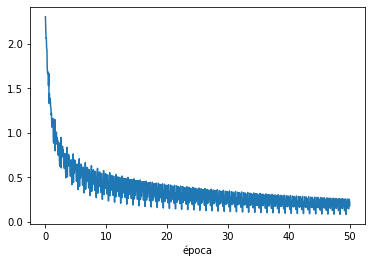

In [ ]:
plt.plot(epochs, loss_history)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

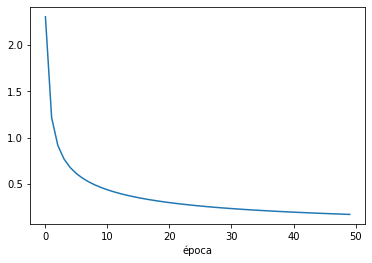

In [ ]:
n_batches_train = len(loader_train)
plt.plot(epochs[::n_batches_train], loss_history[::n_batches_train])
plt.xlabel('época')

In [ ]:
# Assert do histórico de losses
target_loss_epoch_end = np.array([
    1.1979684829711914,
    0.867622971534729,
    0.7226786613464355,
    0.6381281018257141,
    0.5809749960899353,
    0.5387411713600159,
    0.5056464076042175,
    0.4786270558834076,
    0.4558936357498169,
    0.4363219141960144,
    0.4191650450229645,
    0.4039044976234436,
    0.3901679515838623,
    0.3776799440383911,
    0.3662314713001251,
    0.35566139221191406,
    0.34584277868270874,
    0.33667415380477905,
    0.32807353138923645,
    0.31997355818748474,
    0.312318354845047,
    0.3050611615180969,
    0.29816246032714844,
    0.29158851504325867,
    0.28531041741371155,
    0.2793029546737671,
    0.273544579744339,
    0.2680158317089081,
    0.26270008087158203,
    0.2575823664665222,
    0.25264936685562134,
    0.24788929522037506,
    0.24329163134098053,
    0.23884665966033936,
    0.23454584181308746,
    0.23038141429424286,
    0.22634628415107727,
    0.22243399918079376,
    0.2186385989189148,
    0.21495483815670013,
    0.21137762069702148,
    0.20790249109268188,
    0.20452524721622467,
    0.20124195516109467,
    0.19804897904396057,
    0.1949428766965866,
    0.19192075729370117,
    0.188979372382164,
    0.18611609935760498,
    0.1833282858133316])

assert np.allclose(np.array(loss_epoch_end), target_loss_epoch_end, atol=1e-6)

## Exercício 

Escreva um código que responda às seguintes perguntas:





In [ ]:
corret_pred = torch.where(y==y_pred  , pred_prob, torch.tensor([np.nan]))#
wrong_pred = torch.where(y!=y_pred  , pred_prob, torch.tensor([np.nan]))#

In [ ]:
torch.tensor((0.5,))

tensor([0.5000])

In [ ]:
loader_eval = DataLoader(dataset_train, batch_size=len(dataset_train), shuffle=False)

x, y = next(loader_eval)
digits = model(x.view(-1, 28 * 28))

def softmax(x):
  expx = torch.exp(x)
  xsum = torch.sum(expx, dim=1, keepdim=True)
  return expx/xsum

sm=softmax(digits).detach()
y_pred = torch.argmax(sm, dim=1)

pred_prob = torch.max(sm, axis=1)[0]# lines of code ispired from patrick_ferreira
corret_pred = torch.where(y==y_pred  , pred_prob, torch.tensor([0.5]))#
wrong_pred = torch.where(y!=y_pred  , pred_prob, torch.tensor([0.5]))#

Qual é a amostra classificada corretamente, com maior probabilidade?

In [ ]:
idx=torch.argmax(corret_pred).item()
text=' amostra classificada corretamente, com maior probabilidade '
print(text,idx)

 amostra classificada corretamente, com maior probabilidade  183


Qual é a amostra classificada erradamente, com maior probabilidade?



In [ ]:
idx=torch.argmax(wrong_pred).item()
text=' amostra classificada erradamente, com maior probabilidade '
print(text,idx)

 amostra classificada erradamente, com maior probabilidade  271


Qual é a amostra classificada corretamente, com menor probabilidade?



In [ ]:
idx=torch.argmin(corret_pred).item()
text=' amostra classificada corretamente, com menor probabilidade '
print(text,idx)

 amostra classificada corretamente, com menor probabilidade  532


Qual é a amostra classificada erradamente, com menor probabilidade?

In [ ]:
idx=torch.argmin(wrong_pred).item()
text=' amostra classificada erradamente, com menor probabilidade '
print(text,idx)

 amostra classificada erradamente, com menor probabilidade  68


In [ ]:
# Escreva o código aqui:

## Exercício Bonus

Implemente um dataloader que aceite como parâmetro de entrada a distribuição probabilidade das classes que deverão compor um batch.
Por exemplo, se a distribuição de probabilidade passada como entrada for:

`[0.01, 0.01, 0.72, 0.2, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]`

Em média, 72% dos exemplos do batch deverão ser da classe 2, 20% deverão ser da classe 3, e os demais deverão ser das outras classes.

Mostre também que sua implementação está correta.
